In [127]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn import tree, ensemble, metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.graph_objects as go


In [94]:
# read the database
smoking_df = pd.read_csv('../data/smoking.csv')
smoking_df.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


In [95]:
# Dropping ID column as it is not needed
smoking_df.drop('ID',axis=1,inplace=True)

In [96]:
# Check the dataset daya types
smoking_df.dtypes

gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

In [97]:
# describe data set
smoking_df.describe().round(2)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,...,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00
mean,44.18,164.65,65.86,82.05,1.01,1.01,1.03,1.03,121.49,76.00,...,57.29,114.96,14.62,1.09,0.89,26.18,27.04,39.95,0.21,0.37
std,12.07,9.19,12.82,9.27,0.49,0.49,0.16,0.16,13.68,9.68,...,14.74,40.93,1.56,0.40,0.22,19.36,30.95,50.29,0.41,0.48
min,20.00,130.00,30.00,51.00,0.10,0.10,1.00,1.00,71.00,40.00,...,4.00,1.00,4.90,1.00,0.10,6.00,1.00,1.00,0.00,0.00
25%,40.00,160.00,55.00,76.00,0.80,0.80,1.00,1.00,112.00,70.00,...,47.00,92.00,13.60,1.00,0.80,19.00,15.00,17.00,0.00,0.00
50%,40.00,165.00,65.00,82.00,1.00,1.00,1.00,1.00,120.00,76.00,...,55.00,113.00,14.80,1.00,0.90,23.00,21.00,25.00,0.00,0.00
75%,55.00,170.00,75.00,88.00,1.20,1.20,1.00,1.00,130.00,82.00,...,66.00,136.00,15.80,1.00,1.00,28.00,31.00,43.00,0.00,1.00
max,85.00,190.00,135.00,129.00,9.90,9.90,2.00,2.00,240.00,146.00,...,618.00,1860.00,21.10,6.00,11.60,1311.00,2914.00,999.00,1.00,1.00


In [98]:
# check unique value
smoking_df.nunique().sort_values()

oral                     1
gender                   2
dental caries            2
tartar                   2
hearing(right)           2
hearing(left)            2
smoking                  2
Urine protein            6
height(cm)              13
age                     14
eyesight(right)         17
eyesight(left)          19
weight(kg)              22
serum creatinine        38
relaxation              95
HDL                    126
systolic               130
hemoglobin             145
AST                    219
ALT                    245
fasting blood sugar    276
Cholesterol            286
LDL                    289
triglyceride           390
Gtp                    488
waist(cm)              566
dtype: int64

In [99]:
# check null value in data
smoking_df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [100]:
# Checking Duplicate data
print(smoking_df.duplicated().sum())

11140


In [101]:
print("Number of duplicate rows: ", smoking_df[smoking_df.duplicated() == True].shape[0])
print(f"Rows in original Dataframe: {smoking_df.shape[0]}")

new_smoking_df = smoking_df.drop_duplicates()

print(f"Dataframe rows after removing duplicates: {new_smoking_df.shape[0]}")

Number of duplicate rows:  11140
Rows in original Dataframe: 55692
Dataframe rows after removing duplicates: 44552


In [102]:
new_smoking_df.shape

(44552, 26)

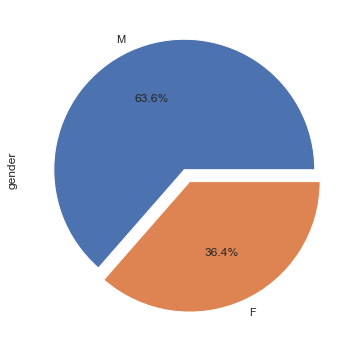

In [103]:
# visualization of gender data
smoking_df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', figsize=(6,6))

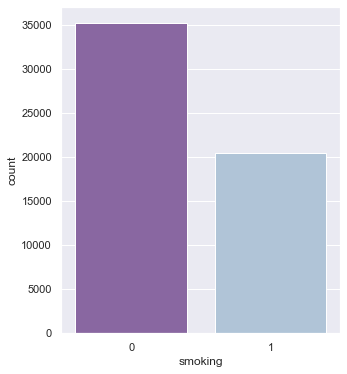

In [104]:
# visualization of gender data
# smoking_df['smoking'].value_counts().plot.bar()
plt.figure(figsize=(5,6))
plt.xlabel("smoking")
sns.countplot(data=smoking_df, x='smoking', palette='BuPu_r')
plt.show()

In [105]:
# total of non smoking and smoking
smoking_df['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

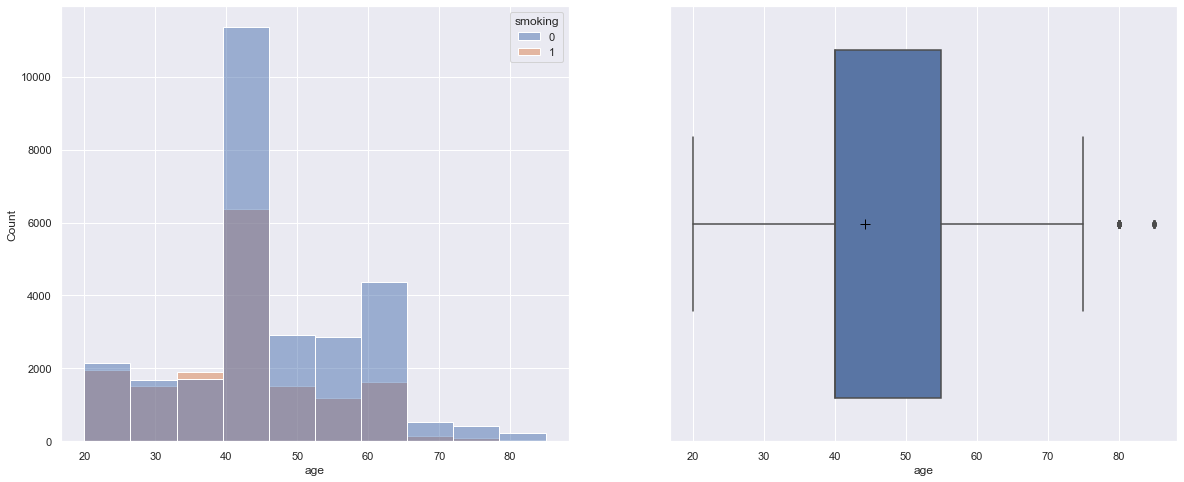

In [106]:
# Age analysys of people who smokes and not
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=new_smoking_df, x="age",hue="smoking", bins=10, ax=ax[0])
sns.boxplot(data=new_smoking_df, x="age", ax=ax[1], showmeans=True,
            meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})


plt.show()

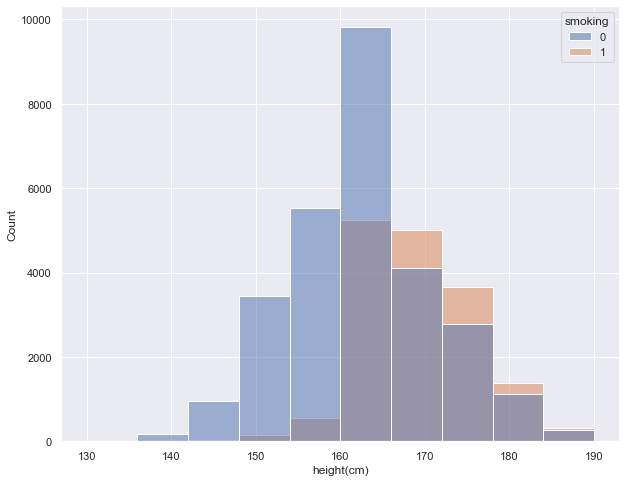

In [107]:
# height analysys of people who smokes and not
plt.figure(figsize=(10, 8))

sns.histplot(data=new_smoking_df, x="height(cm)", hue="smoking", bins=10)

plt.show()

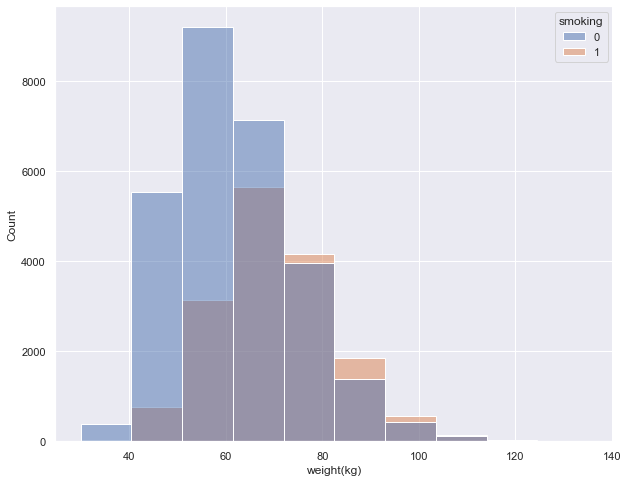

In [108]:
# weight analysys of people who smokes and not
plt.figure(figsize=(10, 8))

sns.histplot(data=new_smoking_df, x="weight(kg)", hue="smoking", bins=10)

plt.show()

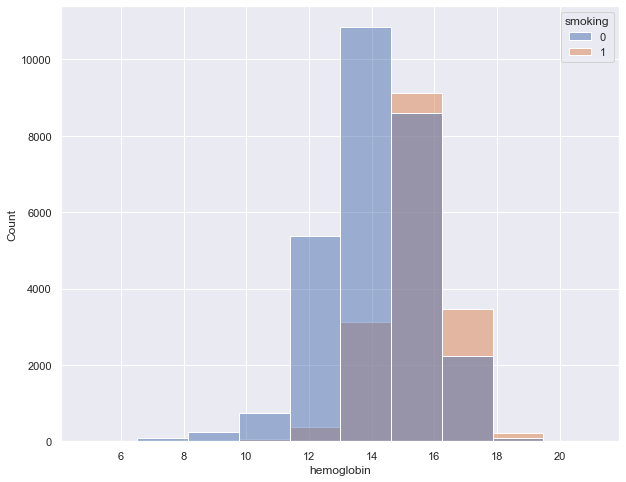

In [109]:
# hemoglobin analysys of people who smokes and not
plt.figure(figsize=(10, 8))

sns.histplot(data=new_smoking_df, x="hemoglobin", hue="smoking", bins=10)

plt.show()

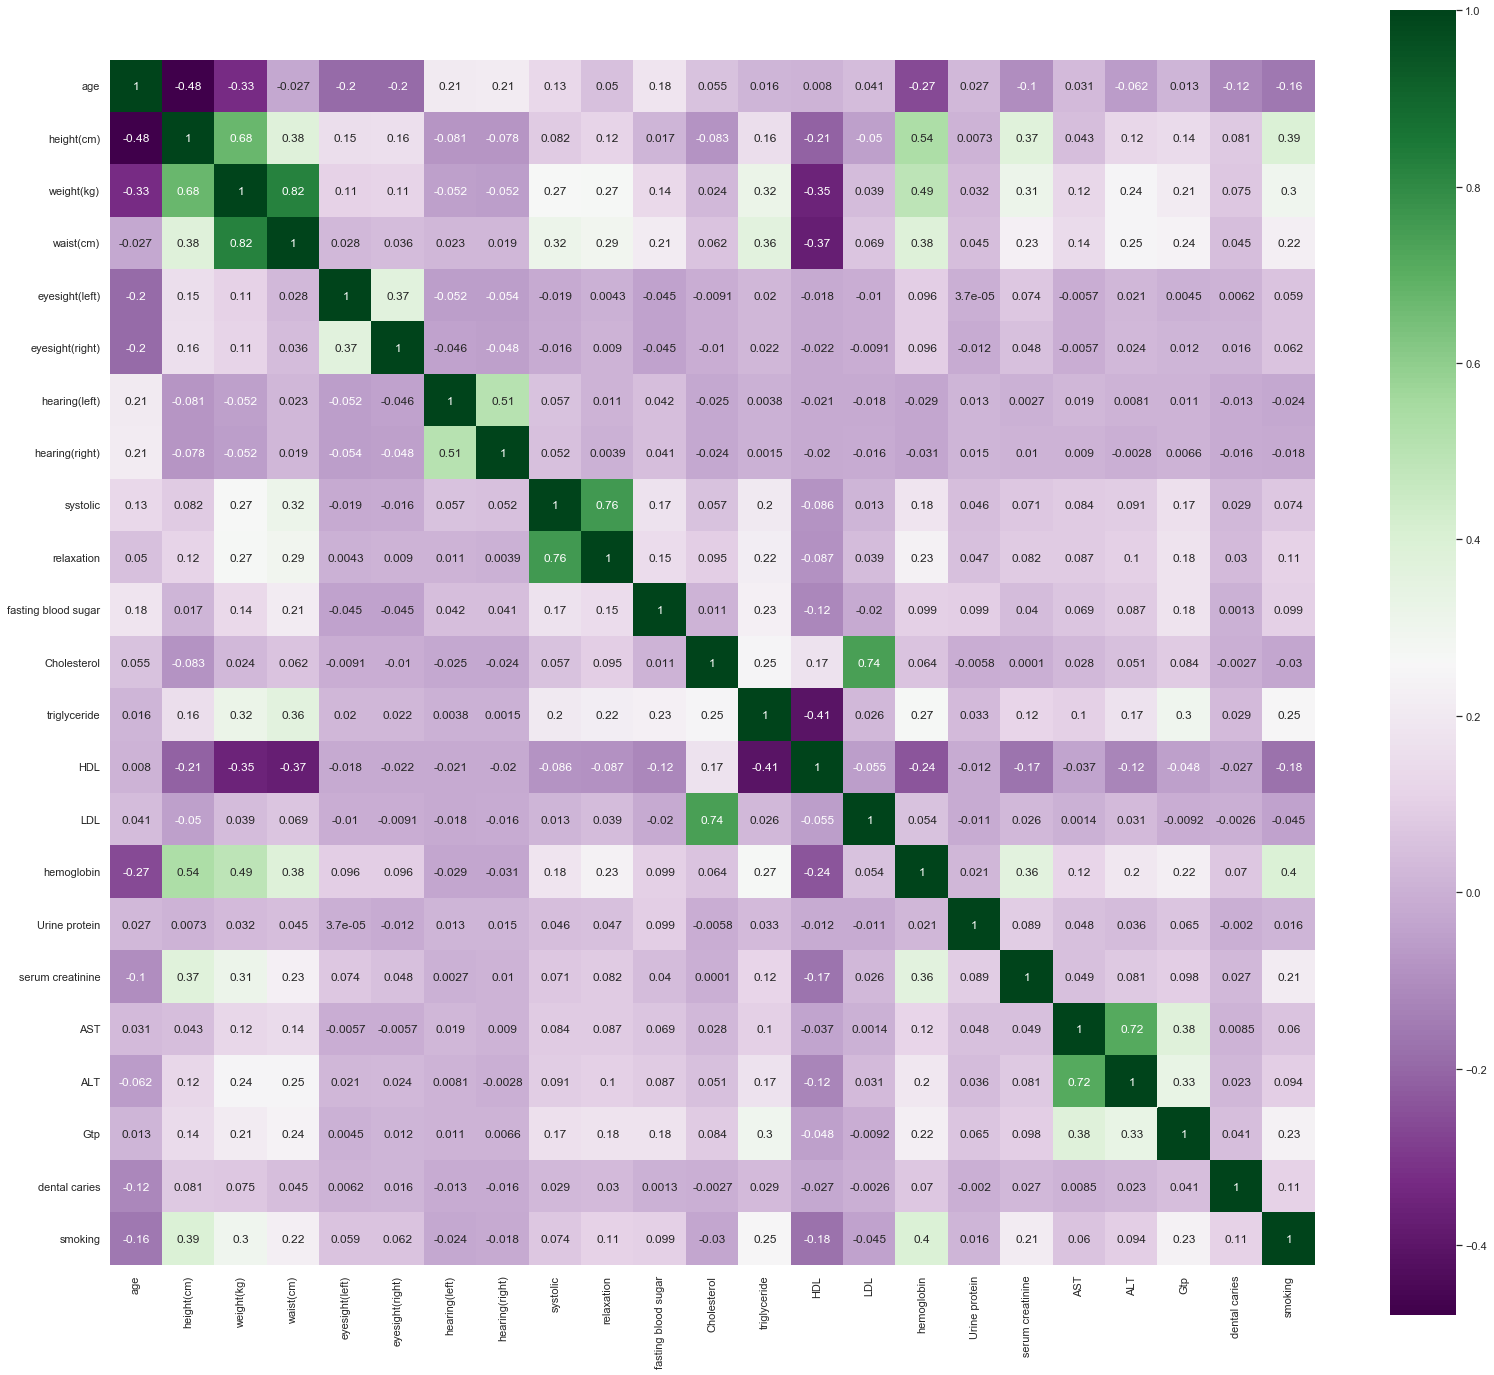

In [110]:
# heatmap of correlation
sns.set(rc={"figure.figsize":(27, 24)})
sns.heatmap(new_smoking_df.corr(), annot=True, square=True, cmap='PRGn')

In [111]:
# check the non number value on the dataset
new_smoking_df.select_dtypes('object')

,gender,oral,tartar
0,F,Y,Y
1,F,Y,Y
2,M,Y,N
3,M,Y,Y
4,F,Y,N
...,...,...,...
44548,M,Y,Y
44549,M,Y,Y
44550,M,Y,Y
44551,M,Y,Y


In [112]:
# Change the categorical / non number value itu number so machine learning can understand it
new_smoking_df['gender'] = new_smoking_df['gender'].str.replace('F','0')
new_smoking_df['gender'] = new_smoking_df['gender'].str.replace('M','1')

/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
new_smoking_df['gender'] = pd.to_numeric(new_smoking_df['gender'])

/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
new_smoking_df['tartar'] = new_smoking_df['tartar'].str.replace('N','0')
new_smoking_df['tartar'] = new_smoking_df['tartar'].str.replace('Y','1')

/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
new_smoking_df['tartar'] = pd.to_numeric(new_smoking_df['tartar'])

/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
new_smoking_df['oral'] = new_smoking_df['oral'].str.replace('N','0')
new_smoking_df['oral'] = new_smoking_df['oral'].str.replace('Y','1')

/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [117]:
new_smoking_df['oral'] = pd.to_numeric(new_smoking_df['oral'])

/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [118]:
# Dropping ID column as it is not needed (all value is pointing to 1 so its redundant)
new_smoking_df.drop('oral',axis=1,inplace=True)

/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [119]:
new_smoking_df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,1,50,170,65,88.0,1.2,1.2,1.0,1.0,148.0,...,108.0,15.2,1.0,1.0,45.0,49.0,51.0,0,1,0
44549,1,35,175,70,84.0,0.6,0.7,1.0,1.0,105.0,...,118.0,15.2,1.0,0.9,20.0,14.0,16.0,0,1,0
44550,1,35,175,70,70.9,1.5,1.5,1.0,1.0,116.0,...,92.0,13.4,1.0,1.0,18.0,19.0,10.0,0,1,0
44551,1,50,165,90,106.8,0.8,0.5,1.0,1.0,122.0,...,104.0,14.5,1.0,0.9,30.0,49.0,40.0,0,1,1


In [120]:
new_smoking_df.dtypes

gender                   int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                   int64
smoking                  int64
dtype: object

In [121]:
# Split our preprocessed data into our features and target arrays
y = new_smoking_df["smoking"]
X = new_smoking_df.drop(["smoking"],axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [122]:
# Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [123]:
DTC = DecisionTreeClassifier(max_depth=15, min_samples_split=50, min_samples_leaf=10)
DTC.fit(X_train, y_train)

DTC_y_pred = DTC.predict(X_test)

DTC_cm = confusion_matrix(y_test, DTC_y_pred)
DTC_cm_df = pd.DataFrame(
    DTC_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", DTC.score(X_train,y_train))
print("Score the X-test  with y-test  is : ", DTC.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,DTC_y_pred)*100)
DTCv = accuracy_score(y_test,DTC_y_pred)
print("Confusion Matrix :")
display(DTC_cm_df)
print("Classification Report :")
print(classification_report(y_test, DTC_y_pred))

Score the X-train with y-train is :  0.8133117854791405
Score the X-test  with y-test  is :  0.7184413718800503
Accuracy Score : 71.84413718800504
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5532,1541
Actual 1,1595,2470


Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      7073
           1       0.62      0.61      0.61      4065

    accuracy                           0.72     11138
   macro avg       0.70      0.69      0.70     11138
weighted avg       0.72      0.72      0.72     11138



In [124]:
# decision tree classifier test 2
tree_classifier = tree.DecisionTreeClassifier(max_depth=15, min_samples_split=50, min_samples_leaf=10).fit(X_train, y_train)
print(f"Accuracy for selected tree model: {metrics.accuracy_score(y_test, tree_classifier.predict(X_test))}")

Accuracy for selected tree model: 0.7190698509606752


In [125]:
# Random Forest Classifier test
RFC = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=45)
RFC.fit(X_train, y_train)
 
RFC_y_pred = RFC.predict(X_test)

RFC_cm = confusion_matrix(y_test, RFC_y_pred)
RFC_cm_df = pd.DataFrame(
    RFC_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", RFC.score(X_train,y_train))
print("Score the X-test  with y-test  is : ", RFC.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,RFC_y_pred)*100)
RFCv = accuracy_score(y_test,RFC_y_pred)
print("Confusion Matrix :")
display(RFC_cm_df)
print("Classification Report :")
print(classification_report(y_test, RFC_y_pred))

Score the X-train with y-train is :  0.7902675525228946
Score the X-test  with y-test  is :  0.7601903393787035
Accuracy Score : 76.01903393787035
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5585,1488
Actual 1,1183,2882


Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7073
           1       0.66      0.71      0.68      4065

    accuracy                           0.76     11138
   macro avg       0.74      0.75      0.75     11138
weighted avg       0.76      0.76      0.76     11138



In [128]:
# Train an XGBoost classifier
XGB = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
XGB.fit(X_train, y_train)

XGB_y_pred = XGB.predict(X_test)

XGB_cm = confusion_matrix(y_test, XGB_y_pred)
XGB_cm_df = pd.DataFrame(
    XGB_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", XGB.score(X_train,y_train))
print("Score the X-test  with y-test  is : ", XGB.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,XGB_y_pred)*100)
XGBv = accuracy_score(y_test,XGB_y_pred)
print("Confusion Matrix :")
display(XGB_cm_df)
print("Classification Report :")
print(classification_report(y_test, XGB_y_pred))

Score the X-train with y-train is :  0.7729993415933442
Score the X-test  with y-test  is :  0.761716645717364
Accuracy Score : 76.1716645717364
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5562,1511
Actual 1,1143,2922


Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7073
           1       0.66      0.72      0.69      4065

    accuracy                           0.76     11138
   macro avg       0.74      0.75      0.75     11138
weighted avg       0.77      0.76      0.76     11138



In [129]:
# Train an Gradientboosting classifier

GB = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
GB.fit(X_train, y_train)

GB_y_pred = GB.predict(X_test)

GB_cm = confusion_matrix(y_test, GB_y_pred)
GB_cm_df = pd.DataFrame(
    GB_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", GB.score(X_train,y_train))
print("Score the X-test  with y-test  is : ", GB.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,GB_y_pred)*100)
GBv = accuracy_score(y_test,GB_y_pred)
print("Confusion Matrix :")
display(GB_cm_df)
print("Classification Report :")
print(classification_report(y_test, GB_y_pred))

Score the X-train with y-train is :  0.7712934698030766
Score the X-test  with y-test  is :  0.762524690249596
Accuracy Score : 76.2524690249596
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5591,1482
Actual 1,1163,2902


Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7073
           1       0.66      0.71      0.69      4065

    accuracy                           0.76     11138
   macro avg       0.74      0.75      0.75     11138
weighted avg       0.77      0.76      0.76     11138



In [130]:
# Train an Logistic Regression classifier
# classifier = LogisticRegression(solver='lbfgs',max_iter=200,random_state=1)
LG = LogisticRegression(solver='lbfgs',max_iter=200,random_state=1)
LG.fit(X_train, y_train)

LG_y_pred = LG.predict(X_test)

LG_cm = confusion_matrix(y_test, LG_y_pred)
LG_cm_df = pd.DataFrame(
    LG_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", LG.score(X_train,y_train))
print("Score the X-test  with y-test  is : ", LG.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,LG_y_pred)*100)
LGv = accuracy_score(y_test,LG_y_pred)
print("Confusion Matrix :")
display(LG_cm_df)
print("Classification Report :")
print(classification_report(y_test, LG_y_pred))

Score the X-train with y-train is :  0.7339139282935296
Score the X-test  with y-test  is :  0.7388220506374573
Accuracy Score : 73.88220506374573
Confusion Matrix :


/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Predicted 0,Predicted 1
Actual 0,5560,1513
Actual 1,1396,2669


Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      7073
           1       0.64      0.66      0.65      4065

    accuracy                           0.74     11138
   macro avg       0.72      0.72      0.72     11138
weighted avg       0.74      0.74      0.74     11138



In [131]:
# create a dictinary of all ML models
dic = {'logistic Regression':LGv, 'Decision Tree Classifier':DTCv, 'Random Forest Classifier':RFCv, 'XGBoost':XGBv, 'GradientBoosting':GBv }

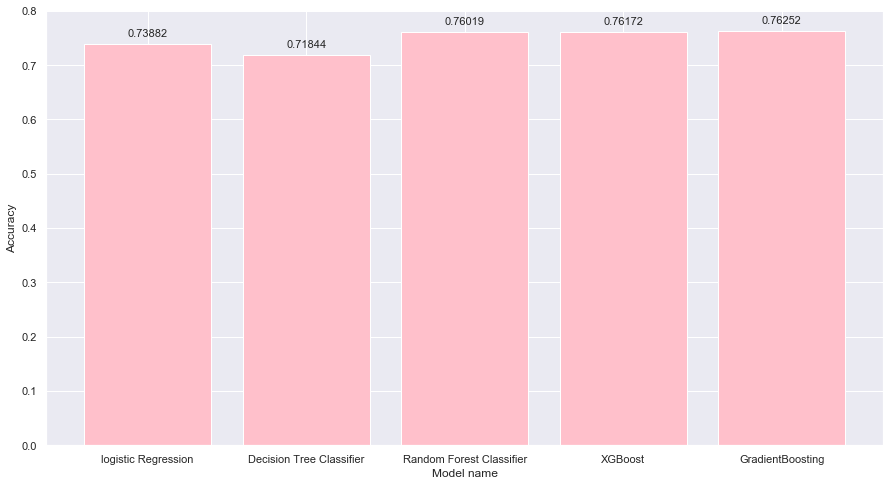

In [132]:
# Visualize all ML model accuracy score results
names = list(dic.keys())
values = list(dic.values())
plt.rc('font', size=20)

plt.figure(figsize=(15,8))
plt.xlabel('Model name')
plt.ylabel('Accuracy')

bars = plt.bar(range(len(dic)), values, tick_label=names,color='pink')
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.5f}', ha='center', va='bottom', fontsize=11)

plt.show()

In [133]:
from sklearn.feature_selection import SelectKBest, f_classif
fs = SelectKBest(score_func=f_classif, k=10)
X_train_new = fs.fit_transform(X_train, y_train)

mask = fs.get_support(indices=True)

print("10 best features: ")
for i, col in enumerate(X_train.columns[mask]):
    print("✅ ", col)

10 best features: 
✅  gender
✅  age
✅  height(cm)
✅  weight(kg)
✅  waist(cm)
✅  triglyceride
✅  HDL
✅  hemoglobin
✅  serum creatinine
✅  Gtp


In [134]:
# Split our preprocessed data into our features and target arrays
features = ['age','gender','height(cm)','weight(kg)','systolic','hemoglobin','triglyceride','HDL','serum creatinine','Gtp','smoking']
X2 = new_smoking_df[features]
y2 = new_smoking_df['smoking']
X2.shape, y2.shape

((44552, 11), (44552,))

In [135]:
# Split our preprocessed data into our features and target arrays
y2 = new_smoking_df['smoking']
X2 = X2.drop(["smoking"],axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [136]:
# RE-Train an Gradientboosting classifier

GB2 = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
GB2.fit(X_train2, y_train2)

GB_y_pred2 = GB2.predict(X_test2)

GB_cm2 = confusion_matrix(y_test2, GB_y_pred2)
GB_cm_df2 = pd.DataFrame(
    GB_cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", GB2.score(X_train2,y_train2))
print("Score the X-test  with y-test  is : ", GB2.score(X_test2,y_test2))
print("Accuracy Score :",accuracy_score(y_test2,GB_y_pred2)*100)
GBv2 = accuracy_score(y_test2,GB_y_pred2)
print("Confusion Matrix :")
display(GB_cm_df2)
print("Classification Report :")
print(classification_report(y_test2, GB_y_pred2))

Score the X-train with y-train is :  0.7591428742443287
Score the X-test  with y-test  is :  0.753636200395044
Accuracy Score : 75.3636200395044
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5545,1528
Actual 1,1216,2849


Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      7073
           1       0.65      0.70      0.67      4065

    accuracy                           0.75     11138
   macro avg       0.74      0.74      0.74     11138
weighted avg       0.76      0.75      0.76     11138



In [137]:
# RE-train Random Forest Classifier test
RFC2 = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=45)
RFC2.fit(X_train2, y_train2)
 
RFC_y_pred2 = RFC2.predict(X_test2)

RFC_cm2 = confusion_matrix(y_test2, RFC_y_pred2)
RFC_cm_df2 = pd.DataFrame(
    RFC_cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", RFC2.score(X_train2,y_train2))
print("Score the X-test  with y-test  is : ", RFC2.score(X_test2,y_test2))
print("Accuracy Score :",accuracy_score(y_test2,RFC_y_pred2)*100)
RFCv2 = accuracy_score(y_test2,RFC_y_pred2)
print("Confusion Matrix :")
display(RFC_cm_df2)
print("Classification Report :")
print(classification_report(y_test2, RFC_y_pred2))

Score the X-train with y-train is :  0.7748548512599509
Score the X-test  with y-test  is :  0.7509427186209373
Accuracy Score : 75.09427186209373
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5525,1548
Actual 1,1226,2839


Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      7073
           1       0.65      0.70      0.67      4065

    accuracy                           0.75     11138
   macro avg       0.73      0.74      0.74     11138
weighted avg       0.76      0.75      0.75     11138



In [138]:
# RE-train Logistic Regression test
LG2 = LogisticRegression(solver='lbfgs',max_iter=200,random_state=1)
LG2.fit(X_train2, y_train2)

LG_y_pred2 = LG2.predict(X_test2)

LG_cm2 = confusion_matrix(y_test2, LG_y_pred2)
LG_cm_df2 = pd.DataFrame(
    LG_cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", LG2.score(X_train2,y_train2))
print("Score the X-test  with y-test  is : ", LG2.score(X_test2,y_test2))
print("Accuracy Score :",accuracy_score(y_test2,LG_y_pred2)*100)
LGv2 = accuracy_score(y_test2,LG_y_pred2)
print("Confusion Matrix :")
display(LG_cm_df2)
print("Classification Report :")
print(classification_report(y_test2, LG_y_pred2))

Score the X-train with y-train is :  0.7334051595139762
Score the X-test  with y-test  is :  0.7348716107021009
Accuracy Score : 73.48716107021009
Confusion Matrix :


/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Predicted 0,Predicted 1
Actual 0,5374,1699
Actual 1,1254,2811


Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7073
           1       0.62      0.69      0.66      4065

    accuracy                           0.73     11138
   macro avg       0.72      0.73      0.72     11138
weighted avg       0.74      0.73      0.74     11138



In [139]:
LGv2

0.7348716107021009

In [140]:
# RE-Train an XGBoost classifier
XGB2 = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
XGB2.fit(X_train2, y_train2)

XGB_y_pred2 = XGB2.predict(X_test2)

XGB_cm2 = confusion_matrix(y_test2, XGB_y_pred2)
XGB_cm_df2 = pd.DataFrame(
    XGB_cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", XGB2.score(X_train2,y_train2))
print("Score the X-test  with y-test  is : ", XGB2.score(X_test2,y_test2))
print("Accuracy Score :",accuracy_score(y_test2,XGB_y_pred2)*100)
XGBv2 = accuracy_score(y_test2,XGB_y_pred2)
print("Confusion Matrix :")
display(XGB_cm_df2)
print("Classification Report :")
print(classification_report(y_test2, XGB_y_pred2))

Score the X-train with y-train is :  0.758484467588436
Score the X-test  with y-test  is :  0.7546238103788832
Accuracy Score : 75.46238103788832
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5518,1555
Actual 1,1178,2887


Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      7073
           1       0.65      0.71      0.68      4065

    accuracy                           0.75     11138
   macro avg       0.74      0.75      0.74     11138
weighted avg       0.76      0.75      0.76     11138



In [81]:
# Fit random forest model for classification
# rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=45)
# rf_model.fit(X_train, y_train)

# # Predict probabilities of smoking status
# y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [148]:
GB_model = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
GB_model.fit(X_train2, y_train2)

# Predict probabilities of smoking status
y_prob_rf = GB_model.predict_proba(X_test2)[:, 1]

In [149]:
y_prob_rf

array([0.36192462, 0.5441057 , 0.50756148, ..., 0.76086053, 0.73732132,
       0.02521873])

In [195]:
# Define the thresholds
thresholds = [0.0, 0.4, 0.525, 1.0]
# Get the predicted probabilities for the test set
y_prob_rf = GB_model.predict_proba(X_test2)[:, 1]
print(y_prob_rf)
# Categorize the predicted probabilities based on the thresholds
y_cat_rf = np.digitize(y_prob_rf, thresholds)
print(y_cat_rf)
# Subtract 1 from the categories to make them start from 0
y_cat_rf -= 1
print(y_cat_rf)

[0.36192462 0.5441057  0.50756148 ... 0.76086053 0.73732132 0.02521873]
[1 3 2 ... 3 3 1]
[0 2 1 ... 2 2 0]


In [196]:
set(np.digitize(y_prob_rf, thresholds))

{1, 2, 3}

In [197]:
set(y_cat_rf)

{0, 1, 2}

In [198]:
# Create a dictionary that contains both the model and the predicted categories
model_dict = {'model': GB_model, 'categories': y_cat_rf}

In [199]:
model_dict

{'model': GradientBoostingClassifier(),
 'categories': array([0, 2, 1, ..., 2, 2, 0])}

In [200]:
# Save the dictionary to a .joblib file
from joblib import dump
# https://scikit-learn.org/stable/model_persistence.html
dump(model_dict, '../model3.joblib')

['../model3.joblib']